In [1]:
import matplotlib.pyplot as plt
from intelligent_placer_lib import functions
from intelligent_placer_lib import rc
import os
import cv2

In [2]:
items = "./source items"
test_items = "./input data/items"
polygons = "./input data/polygons"

items_list = os.listdir(items)
test_items_list = os.listdir(test_items)
polygons_list = os.listdir(polygons)

Measuring the focal distance of input photos from a white sheet photo

In [4]:
import numpy as np
flag = 0
sheet = cv2.imread(os.path.join(items, items_list[items_list.index('sheet.jpg')]))
for elem in test_items_list:
    img = cv2.imread(os.path.join(test_items, elem))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = functions.cropping_img(img)
    mask = img != 255
    rows_indices = np.where(np.any(mask, axis=1))[0]
    first_row_index, last_row_index = rows_indices[0], rows_indices[-1]
    dist = functions.calc_focal_length(sheet, last_row_index - first_row_index)
    if dist < 20 or dist > 35:
        print(f"shooting height = {dist}", f"the shooting height limit has been exceeded for the file {elem}")
        flag = 1
if flag == 1:
    exit(0)

Defining the contour of a polygon and calculating its area

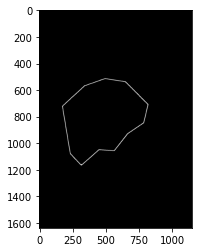

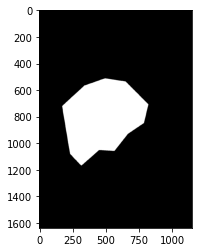

hexagon.jpg 273430


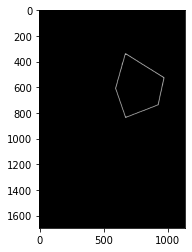

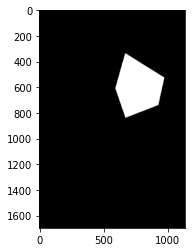

pentagon.jpg 121257


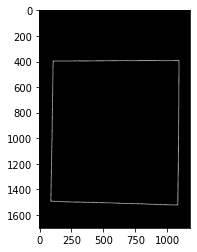

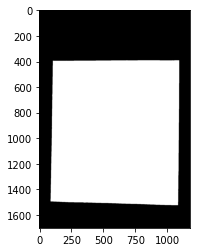

square.jpg 1106366


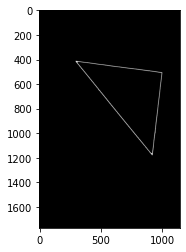

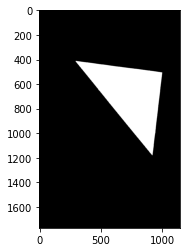

triangle.jpg 243738


In [3]:
for elem in polygons_list:
    img = functions.preproc_img(polygons + "/" + elem)
    if type(img) is rc.RC:
        print(img)
        exit(0)
    cropped_polygon = functions.cropping_img(img)
    if type(cropped_polygon) is tuple:
        print(x for x in cropped_polygon)
        exit(0)
    _, area = functions.find_contour(cropped_polygon)
    if type(area) is tuple:
        print(x for x in area)
        exit(0)
    print(elem, area)

Object recognition

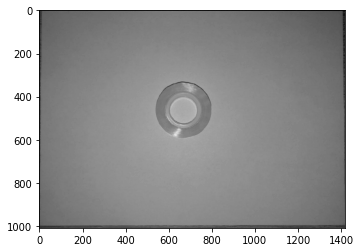

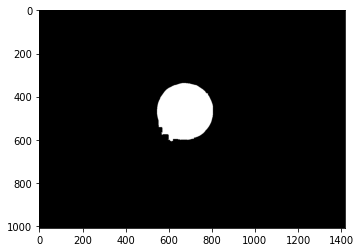

54896


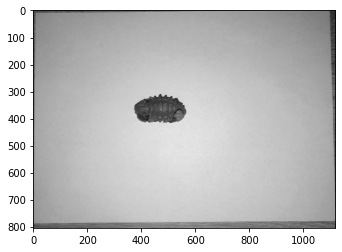

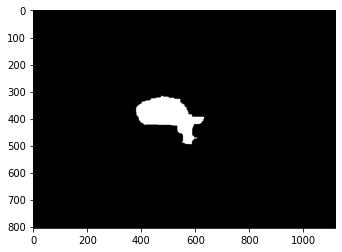

21837


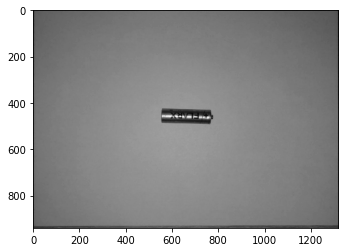

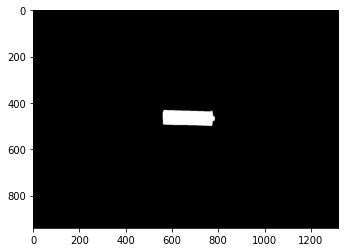

13631


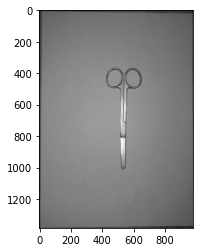

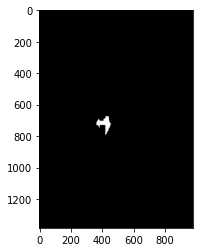

4531


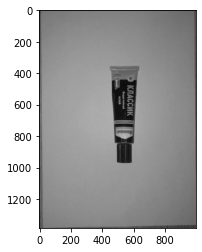

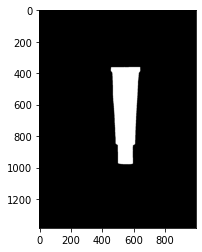

83996


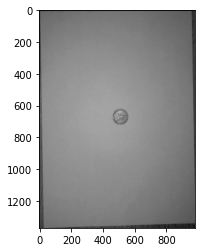

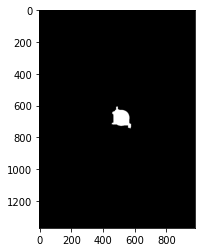

10061


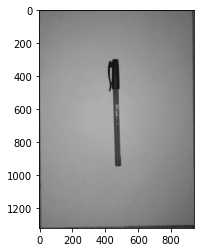

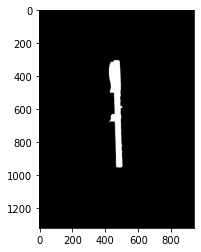

30685


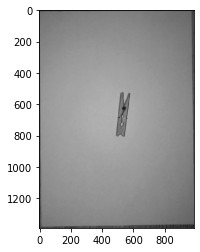

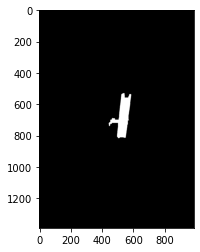

17969


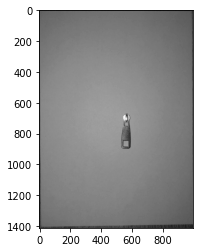

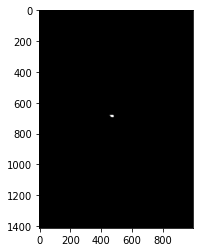

309


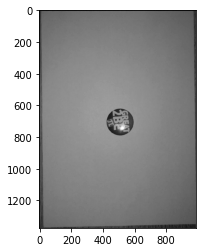

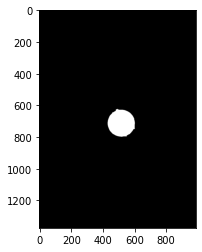

23067


In [3]:
for elem in items_list:
    if elem in (items_list[-1], items_list[-2]):
        continue
    img = functions.preproc_img(items + "/" + elem)
    if type(img) is rc.RC:
        print(img)
        exit(0)
    cropped_item = functions.cropping_img(img)
    plt.imshow(cropped_item, cmap='gray')
    plt.show()
    if type(cropped_item) is tuple:
        print(x for x in cropped_item)
        exit(0)
    mask, mask_area = functions.find_objects(cropped_item)
    print(mask_area)

Finding the corners of each polygon for further packing of objects into it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
elem = polygons_list[0]
img = functions.preproc_img(polygons + "/" + elem)
if type(img) is rc.RC:
    print(img)
    exit(0)
cropped_polygon = functions.cropping_img(img)
if type(cropped_polygon) is tuple:
    print(x for x in cropped_polygon)
    exit(0)
mask, area = functions.find_contour(cropped_polygon)
mask = (mask * 255).astype("uint8")
if type(mask) is rc.RC and type(area) is rc.RC:
    print(x for x in (mask, area))
    exit(0)

corners = cv2.goodFeaturesToTrack(mask, 200, 0.01, 1)
corners = np.int0(corners)

# we iterate through each corner,
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(mask, (x, y), 10, 255, -1)

plt.imshow(mask), plt.show()